In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = '/Users/patrickokwir/Desktop/Lighthouse-data-notes/National-Collision-Database-Analysis/dataset/y_2017_en.xlsx'
data = pd.read_excel(data)
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2017,1,1,10,2,1,2,3,1,3,...,1,UUUU,1,M,75,11,2,NN,1,2456013
1,2017,1,1,12,2,1,4,UU,1,5,...,1,UUUU,1,F,21,11,2,2,1,2456022
2,2017,1,1,0,2,1,3,UU,7,3,...,1,UUUU,1,F,34,11,2,2,1,2456061
3,2017,1,1,17,2,2,21,UU,1,1,...,1,UUUU,1,F,50,11,2,2,1,2456167
4,2017,1,1,17,2,2,21,UU,1,1,...,1,UUUU,1,M,63,11,1,NN,1,2456167


In [3]:
data.describe()

,C_YEAR,C_SEV,C_CASE
count,289823.0,289823.000000,2.898230e+05
mean,2017.0,1.984528,2.512741e+06
std,0.0,0.123419,3.293930e+04
min,2017.0,1.000000,2.455891e+06
25%,2017.0,2.000000,2.484745e+06
50%,2017.0,2.000000,2.512108e+06
75%,2017.0,2.000000,2.541550e+06
max,2017.0,2.000000,2.570302e+06


**Question 2: Using Excel (Pivot Tables/Charts), or any other analytical tool of your choice, generate reports/charts to answer the following questions:**

What age range and which sex are more likely to be associated with a collision?\
What time(s) of days are most associated with a relatively high fatality rate?\
What type(s) of weather are most associated with a relatively high fatality rate?\
What is the effect of using a Safety device on the fatality rate?\
Use the previous charts/reports and perform additional ad hoc analysis of the dataset to outline the key contributing factors to Canadian collisions.

**2.1 What age range and which sex are more likely to be associated with a collision?\**

In [4]:
import copy
df = copy.deepcopy(data)

In [5]:
df['P_SEX'].unique()

array(['M', 'F', 'U', 'N'], dtype=object)

In [6]:
df['P_AGE'].unique()

array([75, 21, 34, 50, 63, 26, 20, 80, 35, 37, 45, 32, 38, 60, 25, 19, 27,
       43, 72, 55, 31, 76, 'UU', 51, 46, 42, 58, 59, 56, 41, 36, 48, 39,
       22, 52, 53, 33, 18, 61, 40, 29, 3, 73, 69, 30, 44, 24, 54, 65, 47,
       70, 71, 13, 23, 17, 74, 15, 66, 88, 57, 49, 67, 14, 64, 28, 68, 77,
       62, 1, 8, 2, 11, 9, 16, 89, 85, 84, 4, 6, 81, 12, 5, 7, 78, 79, 93,
       86, 10, 91, 90, 83, 92, 82, 87, 'NN', 99, 98, 97, 96, 94, 95],
      dtype=object)

In [7]:
df['C_SEV'].unique()

array([2, 1])

Classification structure
Classification of age group - Classification structure\
Code	Category\
1	15 to 24 years\
2	25 - 34 years\
3	35 - 44 years\
4	45 - 54 years\
5	55 - 64 years\
6	65 - 74 years\
7	75 years and over\

source: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=252430

In [8]:
# Filter out rows with 'Unknown' values in 'P_SEX' and convert non-numeric 'P_AGE' values to NaN
df = df[df['P_SEX'] != 'U']
df = df[df['P_SEX']!= 'N']
df = df[df['P_AGE']!= 'UU']
df = df[df['P_AGE']!= 'NN']
df['P_AGE'] = pd.to_numeric(df['P_AGE'], errors='coerce')

# Filter rows where collision severity is either 1 or 2
collision_df = df[df['C_SEV'].isin([1, 2])]


# Filter rows where collision severity is either 1 or 2
collision_df = df[df['C_SEV'].isin([1, 2])]
# Define Sex Labels for each P_SEX value and replace in df
collision_df['P_SEX'] = collision_df['P_SEX'].replace({'M': 'Male', 'F': 'Female'})
# Define Severity Labels for each C_SEV value and replace in collision_df
collision_df['C_SEV'] = collision_df['C_SEV'].replace({'1': 'At least one fatality', '2': 'Non-Fatal'})

# Define age ranges and corresponding labels
age_ranges = [(0, 14), (15, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 74), (75, 100)]
age_range_labels = ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

# Calculate total collisions for each age range and sex combination
collision_counts = collision_df.groupby(['P_SEX', pd.cut(collision_df['P_AGE'], [age[0] for age in age_ranges] + [age_ranges[-1][1]], labels=age_range_labels)]).size().unstack().fillna(0)

# Calculate proportions of collisions for each age range and sex combination
collision_proportions = collision_counts.div(collision_counts.sum(axis=1), axis=0)

# Find the age range and sex with the highest collision proportion
max_collision_proportion = collision_proportions.stack().max()
max_collision_idx = collision_proportions.stack().idxmax()

print(f"The age range and sex more likely to be associated with a collision:")
print(f"Age Range: {max_collision_idx[1]}, Sex: {max_collision_idx[0]}")
print(f"Collision Proportion: {max_collision_proportion:.2%}")



The age range and sex more likely to be associated with a collision:
Age Range: 15-24, Sex: Female
Collision Proportion: 22.15%


In [9]:
from lets_plot import *
LetsPlot.setup_html()

In [10]:
# get data to plot 
plot_data = collision_proportions.transpose().reset_index(level=0)
plot_data

P_SEX,P_AGE,Female,Male
0,0-14,0.081847,0.071099
1,15-24,0.221457,0.213721
2,25-34,0.183045,0.185339
3,35-44,0.155892,0.153019
4,45-54,0.145812,0.153636
5,55-64,0.110213,0.122564
6,65-74,0.063627,0.063949
7,75+,0.038107,0.036673


In [166]:
# plot plot_data using letsplot

# Create the ggplot visualization
p = ggplot(plot_data, aes(x='P_AGE', y='Female')) + geom_lollipop(stat='identity', shape = 1, color = 'red', size = 3, stroke = 2, linewidth=1, show_legend = True) + \
    geom_lollipop(aes(x='P_AGE', y='Male'), stat='identity', position='dodge', width=5, color = 'yellow', linewidth=1, offset= 10, show_legend = True) + \
        theme_classic() + \
            flavor_high_contrast_dark()
# Display legend 
p = p + labs(x = 'Age', y = 'Colission Proportion', title= 'Collision propotions by gender and age group') 
p

2.2 What time(s) of days are most associated with a relatively high fatality rate?

In [12]:
df = copy.deepcopy(data)

Time of Day Most Associated with High Fatality Rate:
Hour: 3.0, Fatality Rate: 2.82%


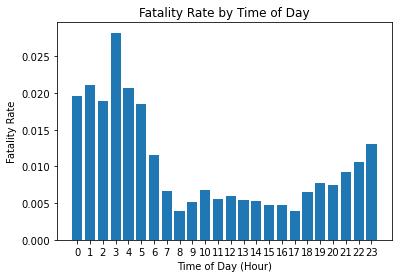

In [13]:
# Convert 'C_HOUR' and 'P_ISEV' columns to numeric
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'], errors='coerce')
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out non-numeric values in 'C_HOUR' and 'P_ISEV'
df = df.dropna(subset=['C_HOUR', 'P_ISEV'])

# Filter rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by 'C_HOUR' and calculate the fatality rate for each hour
fatality_rate_by_hour = fatality_df.groupby('C_HOUR').size() / df.groupby('C_HOUR').size()

# Plot the fatality rate by hour
plt.bar(fatality_rate_by_hour.index, fatality_rate_by_hour.values)
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Fatality Rate')
plt.title('Fatality Rate by Time of Day')
plt.xticks(fatality_rate_by_hour.index)

# Find the hour with the highest fatality rate
max_fatality_rate_hour = fatality_rate_by_hour.idxmax()
max_fatality_rate = fatality_rate_by_hour.max()

print(f"Time of Day Most Associated with High Fatality Rate:")
print(f"Hour: {max_fatality_rate_hour}, Fatality Rate: {max_fatality_rate:.2%}")

plt.show()

In [14]:
fatality_rate_by_hour

C_HOUR
0.0     0.019541
1.0     0.021089
2.0     0.018909
3.0     0.028208
4.0     0.020680
5.0     0.018479
6.0     0.011550
7.0     0.006664
8.0     0.003976
9.0     0.005108
10.0    0.006721
11.0    0.005594
12.0    0.005919
13.0    0.005488
14.0    0.005276
15.0    0.004784
16.0    0.004805
17.0    0.003947
18.0    0.006483
19.0    0.007749
20.0    0.007419
21.0    0.009256
22.0    0.010598
23.0    0.013012
dtype: float64

In [170]:
#numpy array to pandas dataframe
fatality_rate_by_hour = pd.DataFrame(fatality_rate_by_hour).reset_index()
fatality_rate_by_hour

,index,C_HOUR,0
0,0,0.0,0.019541
1,1,1.0,0.021089
2,2,2.0,0.018909
3,3,3.0,0.028208
4,4,4.0,0.020680
5,5,5.0,0.018479
6,6,6.0,0.011550
7,7,7.0,0.006664
8,8,8.0,0.003976
9,9,9.0,0.005108


In [169]:
# plot fatality_rate_by_hour using ggplot

X = fatality_rate_by_hour['C_HOUR']
Y = fatality_rate_by_hour[0]*100
p = ggplot(fatality_rate_by_hour, aes(x=X, y=Y)) + \
    geom_line(color = 'white') + \
    geom_point(color = 'red', size = 3) + \
    labs(x='Hour', y='Fatality rate (%)') + \
theme_classic() + \
    theme(
        axis_text_x = element_text(angle = 0, hjust = 1),
        axis_text_y = element_text(hjust = 1)
    ) + flavor_high_contrast_dark()
p

2.3 What type(s) of weather are most associated with a relatively high fatality rate?

In [17]:
df = copy.deepcopy(data)

In [18]:
# Convert 'C_WTHR' and 'P_ISEV' columns to numeric
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]
# fatality_df['C_WTHR'].replace({1 : 'Dry, normal', 2: 'Wet', 3: 'Snow', 4: 'Slush', 5: 'Icy', 6: 'Sand/gravel', 7: 'Muddy', 8: 'Oil', 9: 'Flooded', 'Q': 'other', 'U': 'Unknown'}, inplace=True)
# Group by 'C_WTHR' and calculate the fatality rate for each weather type
fatality_rate_by_weather = fatality_df.groupby('C_WTHR').size() / df.groupby('C_WTHR').size()

# Plot the fatality rate by weather type
# plt.figure(figsize=(10, 6))
# fatality_rate_by_weather.sort_values(ascending=False).plot(kind='bar')
# plt.xlabel('Weather Type')
# plt.ylabel('Fatality Rate')
# plt.title('Fatality Rate by Weather Type')
# plt.xticks(rotation=45)
# plt.tight_layout()

# Find the weather type with the highest fatality rate
max_fatality_rate_weather = fatality_rate_by_weather.idxmax()
max_fatality_rate = fatality_rate_by_weather.max()

print(f"Weather Type Most Associated with High Fatality Rate:")
print(f"Weather: {max_fatality_rate_weather}, Fatality Rate: {max_fatality_rate:.2%}")

Weather Type Most Associated with High Fatality Rate:
Weather: 6, Fatality Rate: 1.15%


In [19]:
fatality_rate_by_weather =  pd.DataFrame(fatality_rate_by_weather).reset_index()
fatality_rate_by_weather['C_WTHR'].replace({1 : 'Dry', 2: 'Wet', 3: 'Snow', 4: 'Slush', 5: 'Icy', 6: 'Sand/gravel', 7: 'Muddy', 8: 'Oil', 9: 'Flooded', 'Q': 'other', 'U': 'Unknown'}, inplace=True)
fatality_rate_by_weather

,C_WTHR,0
0,Dry,0.006321
1,Wet,0.006669
2,Snow,0.005563
3,Slush,0.006545
4,Icy,0.004231
5,Sand/gravel,0.011474
6,Muddy,0.004020
7,other,0.010417
8,Unknown,0.011333


In [183]:
X = fatality_rate_by_weather['C_WTHR']
Y = fatality_rate_by_weather[0]*100
p = ggplot(fatality_rate_by_weather, aes(x=X, y=Y)) + \
    geom_lollipop(stat = 'identity', color = 'red', size = 2, fatten=3, stroke = 3, width = 0.1) + \
    labs(x='Weather', y='Fatality rate (%)') + \
theme_classic() + \
    theme(
        axis_text_x = element_text(angle = 0, hjust = 1),
        axis_text_y = element_text(hjust = 1), 
        axis_line_y= element_blank()
    ) + flavor_high_contrast_dark()
p

2.3 What is the effect of using a Safety device on the fatality rate?

In [21]:
df = copy.deepcopy(data)

Safety Device Most Associated with High Fatality Rate:
Safety Device: 10, Fatality Rate: 12.66%


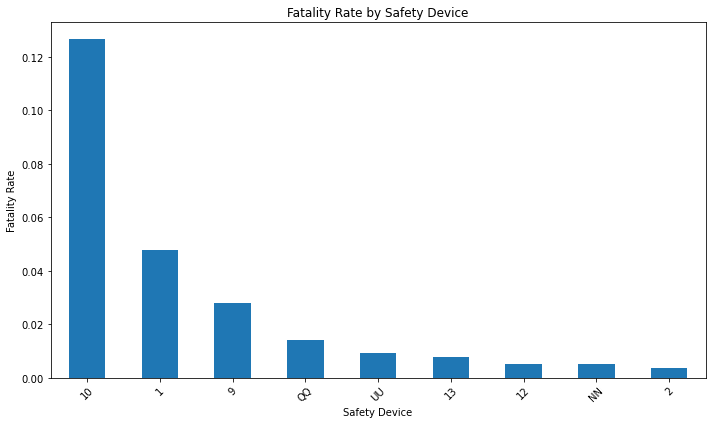

In [22]:
# Convert 'P_SAFE' and 'P_ISEV' columns to numeric
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by 'P_SAFE' and calculate the fatality rate for each safety device category
fatality_rate_by_safety = fatality_df.groupby('P_SAFE').size() / df.groupby('P_SAFE').size()

# Plot the fatality rate by safety device category
plt.figure(figsize=(10, 6))
fatality_rate_by_safety.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Safety Device')
plt.ylabel('Fatality Rate')
plt.title('Fatality Rate by Safety Device')
plt.xticks(rotation=45)
plt.tight_layout()

# Find the safety device with the highest fatality rate
max_fatality_rate_safety = fatality_rate_by_safety.idxmax()
max_fatality_rate = fatality_rate_by_safety.max()

print(f"Safety Device Most Associated with High Fatality Rate:")
print(f"Safety Device: {max_fatality_rate_safety}, Fatality Rate: {max_fatality_rate:.2%}")

plt.show()

In [24]:
fatality_rate_by_safety = pd.DataFrame(fatality_rate_by_safety).reset_index()
fatality_rate_by_safety['P_SAFE'].replace({1: 'No safety device', 
                                           2: 'Safety device used', 
                                           9: 'Helmet', 
                                           10: 'Reflective clothing', 
                                           11: 'Helmet & Reflective clothing', 
                                           12: 'Other safety device', 
                                           13: 'No safety device used  — buses', 
                                           'NN': 'Not applicable', 
                                           'QQ': 'Other', 
                                           'UU': 'Unknown',
                                           'XX': 'No data provided'
                                           }, inplace=True)
fatality_rate_by_safety

,index,P_SAFE,0
0,0,No safety device,0.047818
1,1,Safety device used,0.003761
2,2,Helmet,0.027932
3,3,Reflective clothing,0.126582
4,4,Other safety device,0.005171
5,5,No safety device used — buses,0.007900
6,6,Not applicable,0.005010
7,7,Other,0.014073
8,8,Unknown,0.009238


In [40]:
X = fatality_rate_by_safety['P_SAFE']
Y = fatality_rate_by_safety[0]*100
p = ggplot(fatality_rate_by_safety, aes(x=X, y=Y)) + \
    geom_lollipop(stat = 'identity', color = 'red', size = 2, fill = 'red', fatten=3, stroke = 3) + \
    labs(x='Safety Device', y='Fatality rate (%)') + \
theme_classic() + \
    theme(
        axis_text_x = element_text(angle = 90, hjust = 1),
        axis_text_y = element_text(hjust = 1), 
        axis_line_y=element_line(color='black', size=0.5)
    ) + flavor_high_contrast_dark() + ggsize(800, 600)
p

Road Alignment & Collision Configuration

In [41]:
df = copy.deepcopy(data)

In [43]:
#Prepare the dataset for analyse, replace non-numeric value into number to use in scatter plot.
df1 = df.loc[:,['C_RALN','C_CONF']]
df1.C_RALN = df1.C_RALN.replace({'Q':7,'U':8}).astype(int)
df1.C_CONF = df1.C_CONF.replace({'QQ':42,'UU':43,'XX':43}).astype(int)

In [45]:
#Too many collision configuration involved, iterate a list of dateframes to
# separate different collision config.
df6 = []
df6.append( df1[df1.C_CONF < 10] )
df6.append( df1[(df1.C_CONF > 20)&(df1.C_CONF < 30)] )
df6.append( df1[(df1.C_CONF > 30)&(df1.C_CONF < 40)] )
df6.append( df1[df1.C_CONF > 40] )


In [47]:
#Reformat the dataframe, to summarize the collision numbers in different situation,
# and store in another list of dataframe 'df7'

se6 = []; df7 = []
for i in range(0,4):
    se6.append( df6[i].groupby(['C_RALN','C_CONF']).size() )
    se6[i].name = 'collision'
    df7.append( pd.DataFrame(se6[i]).reset_index() )

df7[3]

,C_RALN,C_CONF,collision
0,1,41,2966
1,1,42,12291
2,1,43,5551
3,2,41,166
4,2,42,1603
5,2,43,880
6,3,41,237
7,3,42,1070
8,3,43,617
9,4,41,49


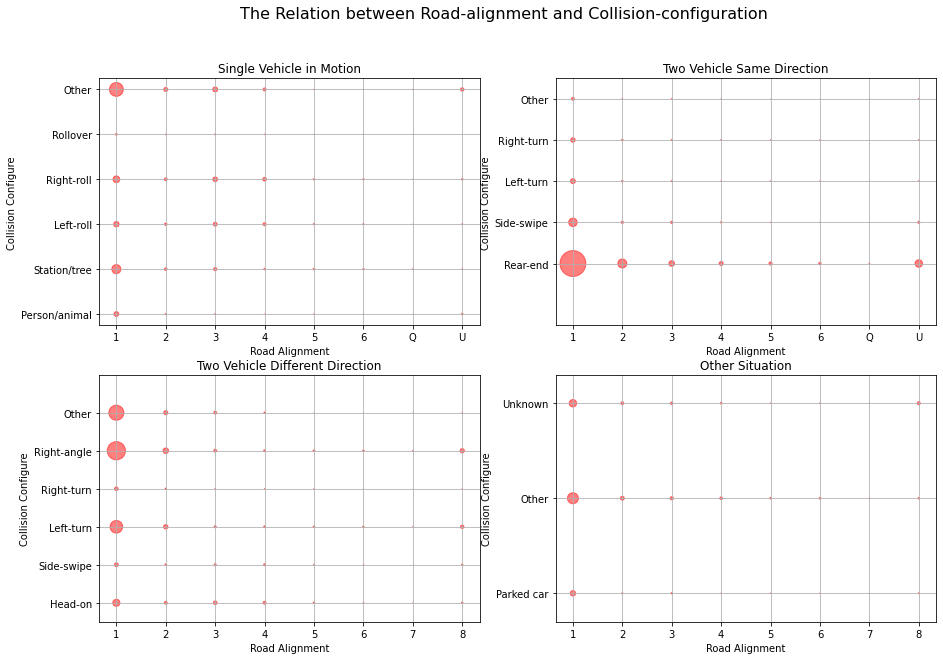

In [61]:
#Draw four subplots to show the relation between the road alignment
# and different collision situations.

fig = plt.figure(figsize=(15, 10))
fig.suptitle("The Relation between Road-alignment and Collision-configuration",
             fontsize = 16)

#---------------------- Only one car involved in collision. ---------------------- 
ax1 = fig.add_subplot(2,2,1)
ax1.set_xticks(range(1,9))
ax1.set_xticklabels([1,2,3,4,5,6,'Q','U'])
ax1.set_xlabel("Road Alignment")

ax1.set_yticks(range(1,7))
ax1.set_yticklabels(['Person/animal','Station/tree','Left-roll',
                     'Right-roll','Rollover','Other'])
ax1.set_ylabel("Collision Configure")

ax1.set_title("Single Vehicle in Motion")
ax1.scatter(df7[0].C_RALN,df7[0].C_CONF,
            df7[0].collision*.01,
            alpha=0.5,color='r')
plt.grid(which='major')

#---------------------- Two car same direction. ---------------------- 
ax2 = fig.add_subplot(2,2,2)
ax2.set_xticks(range(1,9))
ax2.set_xticklabels([1,2,3,4,5,6,'Q','U'])
ax2.set_xlabel("Road Alignment")


ax2.set_ylim([19.5,25.5])
ax2.set_yticks(range(21,26))
ax2.set_yticklabels(['Rear-end','Side-swipe','Left-turn','Right-turn','Other'])
ax2.set_ylabel("Collision Configure")

ax2.set_title("Two Vehicle Same Direction")
ax2.scatter(df7[1].C_RALN,df7[1].C_CONF,
            df7[1].collision*.01,
            alpha=0.5,color='r')
plt.grid(which='major')

#---------------------- Two car different direction. ---------------------- 
ax3 = fig.add_subplot(2,2,3)
ax3.set_xticks(range(1,9))
# ax3.set_xticklabels(C_RALN,rotation=30,ha='right')
ax3.set_xlabel("Road Alignment")

ax3.set_ylim([30.5,37])
ax3.set_yticks(range(31,37))
ax3.set_yticklabels(['Head-on','Side-swipe','Left-turn','Right-turn',
                     'Right-angle','Other'])
ax3.set_ylabel("Collision Configure")

ax3.set_title("Two Vehicle Different Direction")
ax3.scatter(df7[2].C_RALN,df7[2].C_CONF,
            df7[2].collision*.01,
            alpha=0.5,color='r')
plt.grid(which='major')

#---------------------- Other situation. ---------------------- 
ax4 = fig.add_subplot(2,2,4)
ax4.set_xticks(range(1,9))
# ax4.set_xticklabels(C_RALN,rotation=30,ha='right')
ax4.set_xlabel("Road Alignment")

ax4.set_ylim([40.7,43.3])
ax4.set_yticks(range(41,44))
ax4.set_yticklabels(['Parked car','Other','Unknown'])
ax4.set_ylabel("Collision Configure")

ax4.set_title("Other Situation")
ax4.scatter(df7[3].C_RALN,df7[3].C_CONF,
            df7[3].collision*.01,
            alpha=0.5,color='r')
plt.grid(which='major');

Single Veichle in motion

In [105]:
# replace data labels with actual labels
df7[0]['C_CONF'].replace({1: 'moving object', 2: 'stationary object', 3: 'Ran off left', 4: 'Ran off right ', 5: 'Rollover', 6: 'other'}, inplace=True)
df7[0]['C_RALN'].replace({1: 'straight', 2: 'straight—gradient', 3: 'curve-level', 4: 'curved-gradient', 5: 'hill', 6: 'Sag', 7: 'other', 8: 'unknown'}, inplace=True)

In [135]:
# scatter plot of df7[0] using ggplot2
x = df7[0]['C_RALN']
y = df7[0]['C_CONF']
collisions = df7[0]['collision']
p = ggplot(df7[0], aes(x=x, y=y, size = collisions)) + geom_point(color = 'red') + scale_fill_gradient(low = "white", high = "red") + \
    theme_classic() + flavor_high_contrast_dark() +\
        scale_size_area(max_size=15) +theme(legend_position='none') + \
            labs(x = 'Road Alignment', y = 'Road Configuration', size = 'Collisions') + \
            ggtitle('Single Veichle in motion') + ggsize(800, 500)
p

Two car same direction.

In [122]:
#df7[1]

In [123]:
# replace data labels with actual labels
df7[1]['C_CONF'].replace({21: 'Rear-rendered', 22: 'Side swipe', 23: 'left turn conflict', 24: 'right turn conflict', 25: 'same direction '}, inplace=True)
df7[1]['C_RALN'].replace({1: 'straight', 2: 'straight—gradient', 3: 'curve-level', 4: 'curved-gradient', 5: 'hill', 6: 'Sag', 7: 'other', 8: 'unknown'}, inplace=True)

In [134]:
x = df7[1]['C_RALN']
y = df7[1]['C_CONF']
collisions = df7[1]['collision']
p = ggplot(df7[1], aes(x=x, y=y, size = collisions)) + geom_point(color = 'red') + scale_fill_gradient(low = "white", high = "red") + \
    theme_classic() + flavor_high_contrast_dark() +\
        scale_size_area(max_size=15) +theme(legend_position='none') + \
            labs(x = 'Road Alignment', y = 'Road Configuration', size = 'Collisions') + \
            ggtitle('Two Cars in the same direction') + ggsize(800, 500)
p

Two cars in different directions

In [137]:
# df7[2]

In [138]:
# replace data labels with actual labels
df7[2]['C_CONF'].replace({31: 'head-on', 32: 'side swipe', 33: 'left turn conflict', 34: 'right turn conflict', 35: 'right angle', 36: 'other'}, inplace=True)
df7[2]['C_RALN'].replace({1: 'straight', 2: 'straight—gradient', 3: 'curve-level', 4: 'curved-gradient', 5: 'hill', 6: 'Sag', 7: 'other', 8: 'unknown'}, inplace=True)

In [145]:
x = df7[2]['C_RALN']
y = df7[2]['C_CONF']
collisions = df7[2]['collision']
p = ggplot(df7[2], aes(x=x, y=y, size = collisions)) + geom_point(color = 'red') + scale_fill_gradient(low = "white", high = "red") + \
    theme_classic() + flavor_high_contrast_dark() +\
        scale_size_area(max_size=15) +theme(legend_position='none') + \
            labs(x = 'Road Alignment', y = 'Road Configuration', size = 'Collisions') + \
            ggtitle('Two cars in different directions') + ggsize(800, 500)
p

Other situations

In [186]:
# replace data labels with actual labels
df7[3]['C_CONF'].replace({41: 'parked motor vehicle', 42: 'other', 43: 'unknown', 44: 'not available'}, inplace=True)
df7[3]['C_RALN'].replace({1: 'straight', 2: 'straight—gradient', 3: 'curve-level', 4: 'curved-gradient', 5: 'hill', 6: 'Sag', 7: 'other', 8: 'unknown'}, inplace=True)

In [188]:
x = df7[3]['C_RALN']
y = df7[3]['C_CONF']
collisions = df7[3]['collision']
p = ggplot(df7[3], aes(x=x, y=y, size = collisions)) + geom_point(color = 'red') + scale_fill_gradient(low = "white", high = "red") + \
    theme_classic() + flavor_high_contrast_dark() +\
        scale_size_area(max_size=15) +theme(legend_position='none') + \
            labs(x = 'Road Alignment', y = 'Configuration', size = 'Collisions') + \
            ggtitle('Other situations') + ggsize(800, 500)

p

How fatality rates vary by weather conditions and time of day simultaneously,

In [243]:
df = copy.deepcopy(data)

In [223]:
df['C_HOUR'].unique()

array([10, 12, 0, 17, 22, 16, 13, 18, 20, 19, 7, 6, 21, 8, 15, 14, 2, 9,
       3, 'UU', 11, 5, 23, 4, 1], dtype=object)

In [224]:
df['P_ISEV'].unique()

array([2, 1, 'N', 3, 'U'], dtype=object)

In [225]:
df['P_AGE'].unique()

array([75, 21, 34, 50, 63, 26, 20, 80, 35, 37, 45, 32, 38, 60, 25, 19, 27,
       43, 72, 55, 31, 76, 'UU', 51, 46, 42, 58, 59, 56, 41, 36, 48, 39,
       22, 52, 53, 33, 18, 61, 40, 29, 3, 73, 69, 30, 44, 24, 54, 65, 47,
       70, 71, 13, 23, 17, 74, 15, 66, 88, 57, 49, 67, 14, 64, 28, 68, 77,
       62, 1, 8, 2, 11, 9, 16, 89, 85, 84, 4, 6, 81, 12, 5, 7, 78, 79, 93,
       86, 10, 91, 90, 83, 92, 82, 87, 'NN', 99, 98, 97, 96, 94, 95],
      dtype=object)

In [293]:
df = df[df['P_AGE']!= 'UU']
df = df[df['P_AGE']!= 'NN']
df = df[df['P_ISEV']!= 'U']
df = df[df['P_ISEV']!= 'N']
df = df[df['P_SEX']!= 'U']

# Convert columns to numeric
df['P_AGE'] = pd.to_numeric(df['P_AGE'])
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'])

# Define age ranges
age_ranges = [(0, 14), (15, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 74), (75, 100)]

# Create a new column 'AgeRange' based on age ranges
df['AgeRange'] = pd.cut(df['P_AGE'], bins=[age[0] for age in age_ranges] + [age_ranges[-1][1]], labels=[f'{age[0]}-{age[1]}' for age in age_ranges])

# Filter the DataFrame to consider only fatality cases (P_ISEV == 3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by AgeRange and P_SEX, and calculate fatality rates
grouped = fatality_df.groupby(['AgeRange', 'P_SEX']).size().unstack(fill_value=0)
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Convert to percentages

# Find the age range and sex with the highest fatality rate
max_fatality_rate = grouped.max().max()
max_fatality_idx = grouped.stack().idxmax()

print(f"The age range and sex more likely to be associated with high fatality:")
print(f"Age Range: {max_fatality_idx[0]}, Sex: {max_fatality_idx[1]}")
print(f"Fatality Rate: {max_fatality_rate:.2f}%")

The age range and sex more likely to be associated with high fatality:
Age Range: 25-34, Sex: M
Fatality Rate: 76.33%


In [300]:
grouped.reset_index(drop=False, inplace=True)

In [302]:
grouped.reset_index().melt(id_vars=['index', 'AgeRange'], var_name='Gender', value_name='Percentage')
grouped.head()

P_SEX,index,AgeRange,F,M
0,0,0-14,46.835443,53.164557
1,1,15-24,29.651163,70.348837
2,2,25-34,23.674912,76.325088
3,3,35-44,27.272727,72.727273
4,4,45-54,31.063830,68.936170


In [303]:
df_f = grouped[['AgeRange', 'F']].rename(columns={'F': 'Percentage', 'AgeRange': 'AgeRange', 'M': 'F'})
df_m = grouped[['AgeRange', 'M']].rename(columns={'M': 'Percentage', 'AgeRange': 'AgeRange', 'F': 'M'})


In [304]:
df_f['Gender'] = 'F'
df_m['Gender'] = 'M'

In [308]:
df = pd.concat([df_f, df_m])
df

P_SEX,AgeRange,Percentage,Gender
0,0-14,46.835443,F
1,15-24,29.651163,F
2,25-34,23.674912,F
3,35-44,27.272727,F
4,45-54,31.063830,F
5,55-64,27.697842,F
6,65-74,36.158192,F
7,75-100,38.764045,F
0,0-14,53.164557,M
1,15-24,70.348837,M


In [313]:
p = ggplot(df, aes(x='AgeRange', y='Percentage', fill='Gender')) + \
    geom_bar(stat='identity', position='dodge') + \
    scale_fill_brewer(type='qual', palette='Set2') + \
    labs(x='Age Range', y='Percentage', title='Fatality Rates by Age Range and Sex') + \
    theme_classic() + flavor_high_contrast_dark() + \
        theme(
        axis_text_x = element_text(angle = 0, hjust = 1),
        axis_text_y = element_text(hjust = 1), 
        axis_line_y=element_line(color='black', size=0.5)
    )

# Show the plot
p

In [267]:
groupped

,P_SEX,AgeRange,Percentage
0,F,0-14,46.835443
1,M,0-14,53.164557
2,F,15-24,29.651163
3,M,15-24,70.348837
4,F,25-34,23.674912
5,M,25-34,76.325088
6,F,35-44,27.272727
7,M,35-44,72.727273


In [249]:
df = df[df['P_AGE']!= 'UU']
df = df[df['P_AGE']!= 'NN']
df = df[df['P_ISEV']!= 'U']
df = df[df['P_ISEV']!= 'N']
df = df[df['P_SEX']!= 'U']
df = df[df['C_HOUR']!= 'UU']

# Convert columns to numeric
df['P_AGE'] = pd.to_numeric(df['P_AGE'])
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'])
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'])

# Define age ranges
age_ranges = [(0, 14), (15, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 74), (75, 100)]

# Create a new column 'AgeRange' based on age ranges
df['AgeRange'] = pd.cut(df['P_AGE'], bins=[age[0] for age in age_ranges] + [age_ranges[-1][1]], labels=[f'{age[0]}-{age[1]}' for age in age_ranges])

# Filter the DataFrame to consider only fatality cases (P_ISEV == 3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by AgeRange, P_SEX, and C_HOUR, and calculate fatality rates
grouped = fatality_df.groupby(['AgeRange', 'P_SEX', 'C_HOUR']).size().unstack(fill_value=0)
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Convert to percentages

# Find the age range, sex, and hour with the highest fatality rate
max_fatality_rate = grouped.max().max()
max_fatality_idx = grouped.stack().idxmax()

print(f"The age range, sex, and hour more likely to be associated with high fatality:")
print(f"Age Range: {max_fatality_idx[0]}, Sex: {max_fatality_idx[1]}, Hour: {max_fatality_idx[2]}")
print(f"Fatality Rate: {max_fatality_rate:.2f}%")

The age range, sex, and hour more likely to be associated with high fatality:
Age Range: 0-14, Sex: F, Hour: 18
Fatality Rate: 16.22%


In [251]:
grouped.reset_index(drop=False, inplace=True)

In [252]:
grouped

C_HOUR,AgeRange,P_SEX,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,0-14,F,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.702703,...,8.108108,5.405405,10.810811,10.810811,16.216216,2.702703,0.000000,8.108108,5.405405,2.702703
1,0-14,M,4.761905,2.380952,0.000000,0.000000,0.000000,0.000000,0.000000,2.380952,...,4.761905,7.142857,4.761905,4.761905,7.142857,2.380952,11.904762,2.380952,9.523810,0.000000
2,15-24,F,1.960784,4.901961,3.921569,3.921569,0.000000,2.941176,3.921569,5.882353,...,1.960784,5.882353,8.823529,4.901961,6.862745,4.901961,4.901961,8.823529,4.901961,2.941176
3,15-24,M,7.851240,7.438017,4.958678,7.438017,3.305785,2.892562,3.305785,2.066116,...,4.958678,5.371901,6.198347,2.892562,6.198347,4.132231,2.479339,3.305785,3.305785,4.132231
4,25-34,F,4.477612,4.477612,5.970149,2.985075,1.492537,0.000000,5.970149,10.447761,...,4.477612,1.492537,14.925373,0.000000,4.477612,1.492537,1.492537,1.492537,2.985075,4.477612
5,25-34,M,4.629630,0.925926,3.703704,3.703704,3.240741,2.777778,6.481481,4.166667,...,3.240741,4.629630,2.777778,4.166667,4.629630,5.092593,5.092593,6.018519,6.018519,8.333333
6,35-44,F,2.898551,8.695652,1.449275,2.898551,0.000000,2.898551,2.898551,4.347826,...,8.695652,5.797101,5.797101,4.347826,5.797101,2.898551,4.347826,0.000000,4.347826,5.797101
7,35-44,M,3.260870,3.804348,1.086957,4.347826,3.804348,4.347826,4.891304,3.260870,...,3.260870,2.717391,4.347826,8.695652,4.891304,3.804348,3.804348,9.239130,8.152174,3.804348
8,45-54,F,5.479452,0.000000,0.000000,2.739726,4.109589,2.739726,2.739726,2.739726,...,6.849315,4.109589,2.739726,6.849315,10.958904,4.109589,5.479452,8.219178,2.739726,2.739726
9,45-54,M,2.469136,3.703704,4.320988,1.234568,1.234568,4.938272,4.938272,5.555556,...,3.086420,7.407407,4.320988,1.851852,6.790123,7.407407,3.703704,6.790123,4.320988,3.086420


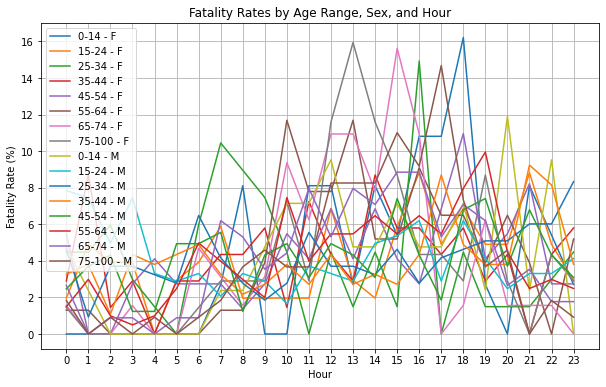

In [257]:
df = df[df['P_AGE']!= 'UU']
df = df[df['P_AGE']!= 'NN']
df = df[df['P_ISEV']!= 'U']
df = df[df['P_ISEV']!= 'N']
df = df[df['P_SEX']!= 'U']
df = df[df['C_HOUR']!= 'UU']

df['P_AGE'] = pd.to_numeric(df['P_AGE'])
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'])
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'])

# Define age ranges
age_ranges = [(0, 14), (15, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 74), (75, 100)]

# Create a new column 'AgeRange' based on age ranges
df['AgeRange'] = pd.cut(df['P_AGE'], bins=[age[0] for age in age_ranges] + [age_ranges[-1][1]], labels=[f'{age[0]}-{age[1]}' for age in age_ranges])

# Filter the DataFrame to consider only fatality cases (P_ISEV == 3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by AgeRange, P_SEX, and C_HOUR, and calculate fatality rates
grouped = fatality_df.groupby(['AgeRange', 'P_SEX', 'C_HOUR']).size().unstack(fill_value=0)
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each line for different sex and age group
for sex in ['F', 'M']:
    for age_range in grouped.index.levels[0]:
        data = grouped.loc[age_range, sex]
        ax.plot(data.index, data.values, label=f'{age_range} - {sex}')

ax.set_xlabel('Hour')
ax.set_ylabel('Fatality Rate (%)')
ax.set_title('Fatality Rates by Age Range, Sex, and Hour')
ax.legend()
ax.grid()

plt.xticks(range(24))
plt.show()